In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering, SpectralCoclustering
from sklearn.metrics import consensus_score
import pandas as pd

In [7]:
NO_WEIGHT = 0.0
MAYBE_WEIGHT = 0.5
YES_WEIGHT = 1.0

mapping = {
    'NO': NO_WEIGHT,
    'MAYBE': MAYBE_WEIGHT,
    'YES': YES_WEIGHT
}
rev_mapping = {
    YES_WEIGHT: 'YES',
    MAYBE_WEIGHT: 'MAYBE',
    NO_WEIGHT: 'NO'
}

In [8]:
def make_highlight(value, color):
    def inner(s):
        '''
        highlight values
        '''
        is_max = s == value
        return [f"background-color: {color}" if v else '' for v in is_max]
    return inner

def highlight(df):
    return df.style.\
        apply(make_highlight('YES', 'green')).\
        apply(make_highlight('MAYBE', 'yellow')).\
        apply(make_highlight('NO', 'red'))

In [9]:
df = pd.read_csv('./role-responsibilities.csv')
responsibilities = list(df['Responsibility'])
titles = list(df.columns.values[1:])
df.set_index('Responsibility',drop=True)
highlight(df)

,Responsibility,Program Manager,Module Owner,Project Manager,Science Lead,Product manager,Product Owner,Tech Lead,Project coordinator
0,Shepherd RFCs,YES,YES,NO,NO,NO,NO,YES,NO
1,Define governance,YES,YES,NO,NO,NO,NO,NO,NO
2,Define a program roadmap,YES,NO,NO,NO,NO,NO,MAYBE,NO
3,Manage program schedule; set deadlines on delivery,YES,NO,NO,NO,NO,NO,NO,MAYBE
4,Manage a portfolio of projects (program),YES,NO,NO,NO,NO,NO,NO,MAYBE
5,Manage program budget,YES,NO,NO,NO,NO,NO,NO,NO
6,Manage program scope,YES,NO,NO,NO,NO,NO,NO,NO
7,Align program to Org. goals,YES,NO,NO,NO,NO,NO,NO,NO
8,Task Estimation,MAYBE,NO,YES,MAYBE,NO,YES,YES,NO
9,Manage project WIP,MAYBE,NO,YES,NO,NO,YES,NO,MAYBE


In [10]:
for name, val in mapping.items():
    df = df.replace(name, val)
data = df.values[:,1:].astype(float)

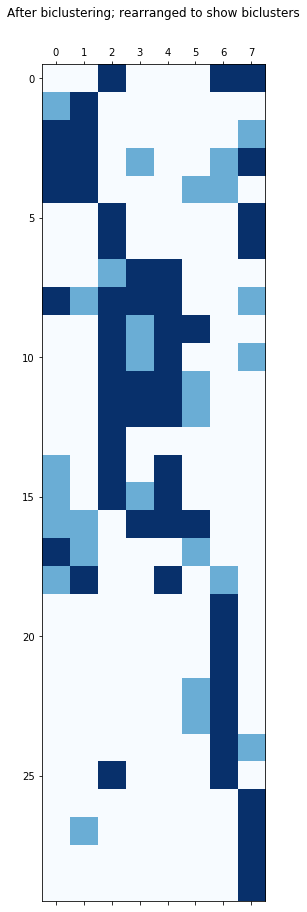

In [11]:
model = SpectralCoclustering(n_clusters=4, random_state=0)
model.fit(data)
fit_data = data[np.argsort(model.row_labels_)]
fit_responsibilities = np.array(responsibilities)[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]
fit_titles = np.array(titles)[np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

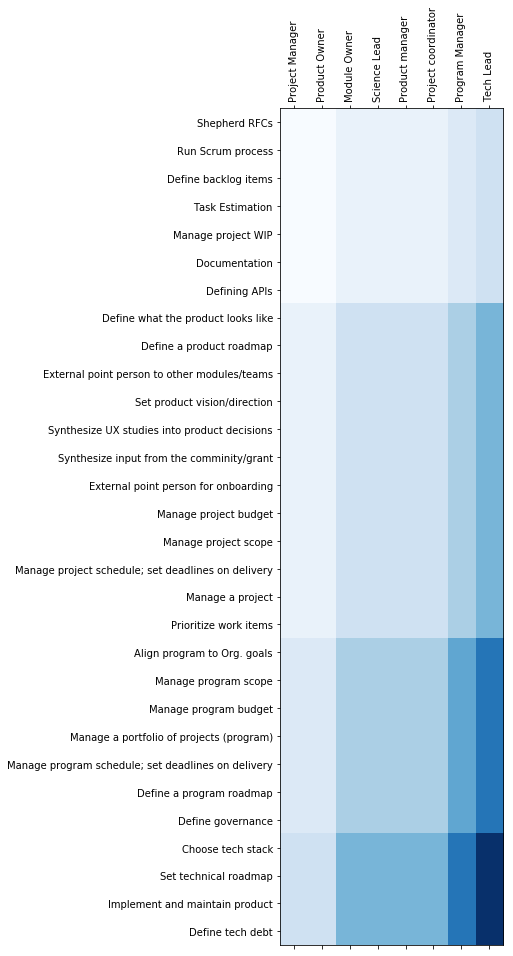

In [12]:
plt.matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1),
            cmap=plt.cm.Blues,
           fignum=1)

plt.xticks(range(len(fit_titles)), fit_titles, rotation='vertical')
plt.yticks(range(len(fit_responsibilities)), fit_responsibilities)

plt.show()

In [13]:
clustered_df = pd.DataFrame(data=fit_data, index=fit_responsibilities, columns=fit_titles)

for val, name in rev_mapping.items():
    clustered_df = clustered_df.replace(val, name)
highlight(clustered_df)

,Project Manager,Product Owner,Module Owner,Science Lead,Product manager,Project coordinator,Program Manager,Tech Lead
Shepherd RFCs,NO,NO,YES,NO,NO,NO,YES,YES
Run Scrum process,MAYBE,YES,NO,NO,NO,NO,NO,NO
Define backlog items,YES,YES,NO,NO,NO,NO,NO,MAYBE
Task Estimation,YES,YES,NO,MAYBE,NO,NO,MAYBE,YES
Manage project WIP,YES,YES,NO,NO,NO,MAYBE,MAYBE,NO
Documentation,NO,NO,YES,NO,NO,NO,NO,YES
Defining APIs,NO,NO,YES,NO,NO,NO,NO,YES
Define what the product looks like,NO,NO,MAYBE,YES,YES,NO,NO,NO
Define a product roadmap,YES,MAYBE,YES,YES,YES,NO,NO,MAYBE
External point person to other modules/teams,NO,NO,YES,MAYBE,YES,YES,NO,NO
